In [165]:
import pandas as pd
from nltk.metrics import edit_distance, binary_distance
from pyphonetics import Soundex
import string
import numpy as np
import ast
import matplotlib.pyplot as plt

In [166]:
df = pd.read_csv('tt_dataset.csv')
df

,text,phonemes,soundex
0,Peter Piper picked a peck of pickled peppers. ...,"[['P', 'IY1', 'T', 'ER0'], ['P', 'AY1', 'P', '...","['P360', 'P160', 'P230', 'A000', 'P200', 'O100..."
1,I saw Susie sitting in a shoe shine shop. Wher...,"[['AY1'], ['S', 'AO1'], ['S', 'UW1', 'Z', 'IY0...","['I000', 'S000', 'S200', 'S352', 'I500', 'A000..."
2,How many boards Could the Mongols hoard If the...,"[['HH', 'AW1'], ['M', 'EH1', 'N', 'IY0'], ['B'...","['H000', 'M500', 'B632', 'C430', 'T000', 'M524..."
3,How can a clam cram in a clean cream can?,"[['HH', 'AW1'], ['K', 'AE1', 'N'], ['AH0'], ['...","['H000', 'C500', 'A000', 'C450', 'C650', 'I500..."
4,Send toast to ten tense stout saints' ten tall...,"[['S', 'EH1', 'N', 'D'], ['T', 'OW1', 'S', 'T'...","['S530', 'T230', 'T000', 'T500', 'T520', 'S330..."
...,...,...,...
2671,Then step up mister and twist your tongue,"[['DH', 'EH1', 'N'], ['S', 'T', 'EH1', 'P'], [...","['T500', 'S310', 'U100', 'M236', 'A530', 'T230..."
2672,Now Kissle will whistle at busty Miss. Russell...,"[['N', 'AW1'], ['K', 'IH1', 'S', 'AH0', 'L'], ...","['N000', 'K240', 'W400', 'W234', 'A300', 'B230..."
2673,"Purple paper people, purple paper people, purp...","[['P', 'ER1', 'P', 'AH0', 'L'], ['P', 'EY1', '...","['P614', 'P160', 'P140', 'P614', 'P160', 'P140..."
2674,De doorgaans dappere Durgerdammer drukker Dirk...,"[['D', 'IY1'], ['D', 'AO1', 'R', 'G', 'AH0', '...","['D000', 'D625', 'D160', 'D626', 'D626', 'D620..."


In [167]:

print(df['text'].iloc[9])
print(df['phonemes'].iloc[9])

Something in a thirty-acre thermal thicket of thorns and thistles thumped and thundered threatening the three-D thoughts of Matthew the thug - although, theatrically, it was only the thirteen-thousand thistles and thorns through the underneath of his thigh that the thirty year old thug thought of that morning.
[['S', 'AH1', 'M', 'TH', 'IH0', 'NG'], ['IH0', 'N'], ['AH0'], ['TH', 'ER1', 'T', 'IY0', 'AA2', 'K', 'S'], ['TH', 'ER1', 'M', 'AH0', 'L'], ['TH', 'IH1', 'K', 'IH0', 'T'], ['AH1', 'V'], ['TH', 'AO1', 'R', 'N', 'Z'], ['AH0', 'N', 'D'], ['TH', 'IH1', 'S', 'AH0', 'L', 'Z'], ['TH', 'AH1', 'M', 'P', 'T'], ['AH0', 'N', 'D'], ['TH', 'AH1', 'N', 'D', 'ER0', 'D'], ['TH', 'R', 'EH1', 'T', 'AH0', 'N', 'IH0', 'NG'], ['DH', 'AH0'], ['TH', 'R', 'IY1', 'D'], ['TH', 'AO1', 'T', 'S'], ['AH1', 'V'], ['M', 'AE1', 'TH', 'Y', 'UW0'], ['DH', 'AH0'], ['TH', 'AH1', 'G'], ['AO2', 'L', 'DH', 'OW1'], ['TH', 'IY0', 'AE1', 'T', 'R', 'IH0', 'K', 'AH0', 'L', 'IY0'], ['IH1', 'T'], ['W', 'AA1', 'Z'], ['OW1', 'N', 

## implement metrics

### for text

In [168]:
### necessary functions

# remove all punctuation from a string
def remove_punctuation(input_string):
    punctuation_chars = string.punctuation # Create a string containing all punctuation marks
    no_punct = ''.join(char for char in input_string if char not in punctuation_chars) # Create new string without punctuation
    
    return no_punct



In [169]:
# calculates levenshtein dist between every two words in a string
# args: input string, boolean of allowing transpositions
def text_levenshtein_dist_matrix(tongue_twister, transp):
    words = remove_punctuation(tongue_twister).split(' ') # split tt into indiv words
    levenshtein_arr = np.zeros((len(words), len(words))) # initialise distance array
    for i in range(len(words)):
        for j in range(i+1, len(words)):
            dist = edit_distance(words[i], words[j], substitution_cost=1, transpositions=transp) # Transposition True because of difficulty to distinguish both words
            levenshtein_arr[i, j] = dist
            levenshtein_arr[j, i] = dist
            
    return levenshtein_arr


# calculates binary dist between every two words in a string
# args: input string
def text_binary_dist_matrix(tongue_twister):
    words = remove_punctuation(tongue_twister).split(' ') # split tt into indiv words
    binary_dist_arr = np.zeros((len(words), len(words))) # initialise distance array
    for i in range(len(words)):
        for j in range(i, len(words)):
            dist = binary_distance(words[i], words[j]) 
            binary_dist_arr[i, j] = dist
            binary_dist_arr[j, i] = dist
            
    return binary_dist_arr

In [280]:
# text = 
print(text_levenshtein_dist_matrix(df['text'].iloc[4], False))
print(df['text'].iloc[4])


[[0. 5. 4. 2. 3. 5. 5. 2. 4. 3.]
 [5. 0. 3. 4. 3. 3. 5. 4. 3. 4.]
 [4. 3. 0. 2. 4. 3. 5. 2. 3. 4.]
 [2. 4. 2. 0. 2. 4. 5. 0. 3. 2.]
 [3. 3. 4. 2. 0. 5. 5. 2. 4. 2.]
 [5. 3. 3. 4. 5. 0. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 4. 0. 5. 5. 3.]
 [2. 4. 2. 0. 2. 4. 5. 0. 3. 2.]
 [4. 3. 3. 3. 4. 4. 5. 3. 0. 4.]
 [3. 4. 4. 2. 2. 4. 3. 2. 4. 0.]]
Send toast to ten tense stout saints' ten tall tents.


### for phonemes

In [170]:
### notwendige Funktionen

# Nimmt zwei Listen mit Phonemen (, die je ein Wort darstellen) und gibt den Levenshtein-Abstand zwischen den Phonemlisten zurück
def phoneme_levenshtein_dist(ph_list1, ph_list2):
    len_str1 = len(ph_list1) + 1
    len_str2 = len(ph_list2) + 1
    matrix = [[0] * len_str2 for _ in range(len_str1)] # Erstellung der Matrix, in der die Abstände gespeichert werden
    # Erste Zeile und Spalte füllen
    for i in range(len_str1):
        matrix[i][0] = i
    for j in range(len_str2):
        matrix[0][j] = j
    # Restliche Matrix füllen
    for i in range(1, len_str1):
        for j in range(1, len_str2):
            cost = 0 if ph_list1[i - 1] == ph_list2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,      # Löschen
                matrix[i][j - 1] + 1,      # Einfügen
                matrix[i - 1][j - 1] + cost  # Ersetzen
            )

    # letzten Matrixwert mit Levenshtein-Abstand ausgeben
    return matrix[-1][-1]


In [171]:

def phoneme_levenshtein_dist_matrix(tt_phonemes):
    levenshtein_arr = np.zeros((len(tt_phonemes), len(tt_phonemes))) # initialise distance array
    for i in range(len(tt_phonemes)):
        for j in range(i+1, len(tt_phonemes)):
            dist = phoneme_levenshtein_dist(tt_phonemes[i], tt_phonemes[j])
            levenshtein_arr[i, j] = dist
            levenshtein_arr[j, i] = dist  
    print(levenshtein_arr.shape)      
    return levenshtein_arr


# berechnet Gleichheit von Phonemlisten paarweise
# args: Liste mit Phonemlisten
def phoneme_binary_dist_matrix(ph_list):
    binary_dist_arr = np.zeros((len(ph_list), len(ph_list))) # initialise distance array
    for i in range(len(ph_list)):
        for j in range(i, len(ph_list)):
            if ph_list[i] != ph_list[j]:
                binary_dist_arr[i, j] = 1
                binary_dist_arr[j, i] = 1
            
    return binary_dist_arr


### for soundex

In [172]:


# berechnet Levenshtein-Abstand zwischen Soundex-Repräsentationen paarweise
# args: Liste mit Soundex-Repräsentationen
def soundex_levenshtein_dist_matrix(soundex_list):
    levenshtein_arr = np.zeros((len(soundex_list), len(soundex_list))) # initialise distance array
    for i in range(len(soundex_list)):
        for j in range(i+1, len(soundex_list)):
            dist = edit_distance(soundex_list[i], soundex_list[j], substitution_cost=1, transpositions=False)
            levenshtein_arr[i, j] = dist
            levenshtein_arr[j, i] = dist
            
    return levenshtein_arr




# berechnet Gleichheit von Soundex-Repräsentationen paarweise
# args: Liste mit Soundex-Repräsentationen
def soundex_binary_dist_matrix(sx_list):
    binary_dist_arr = np.zeros((len(sx_list), len(sx_list))) # initialise distance array
    for i in range(len(sx_list)):
        for j in range(i, len(sx_list)):
            if sx_list[i] != sx_list[j]:
                binary_dist_arr[i, j] = 1
                binary_dist_arr[j, i] = 1
            
    return binary_dist_arr

### Anwendung der Abstände

#### erste beispielhafte Tests

In [173]:
test_text = df['text'][16]
test_phonemes = ast.literal_eval(df['phonemes'][15])
test_soundex = ast.literal_eval(df['soundex'][15])

print(test_text)
print(text_levenshtein_dist_matrix(test_text, False), '\n', text_binary_dist_matrix(test_text))
print(test_phonemes)
print(phoneme_levenshtein_dist_matrix(test_phonemes), '\n', phoneme_binary_dist_matrix(test_phonemes))
print(test_soundex)
print(soundex_levenshtein_dist_matrix(test_soundex), '\n', soundex_binary_dist_matrix(test_soundex))

I wish to wish the wish you wish to wish, but if you wish the wish the witch wishes, I won't wish the wish you wish to wish.
[[0. 4. 2. 4. 3. 4. 3. 4. 2. 4. 3. 2. 3. 4. 3. 4. 3. 5. 6. 0. 4. 4. 3. 4.
  3. 4. 2. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.
  4. 0. 4. 0.]
 [2. 4. 0. 4. 2. 4. 2. 4. 0. 4. 3. 2. 2. 4. 2. 4. 2. 4. 6. 2. 3. 4. 2. 4.
  2. 4. 0. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.
  4. 0. 4. 0.]
 [3. 4. 2. 4. 0. 4. 3. 4. 2. 4. 3. 3. 3. 4. 0. 4. 0. 4. 4. 3. 4. 4. 0. 4.
  3. 4. 2. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.
  4. 0. 4. 0.]
 [3. 4. 2. 4. 3. 4. 0. 4. 2. 4. 3. 3. 0. 4. 3. 4. 3. 5. 6. 3. 3. 4. 3. 4.
  0. 4. 2. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.
  4. 0. 4. 0.]
 [2. 4. 0. 4. 2. 4. 2. 4. 0. 4. 3. 2. 2. 4. 2. 4. 2. 4. 6. 2. 3. 4. 2. 4.
  2. 4. 0. 4.]
 [4. 0. 4. 0. 4. 0. 4. 0. 4. 0. 4. 3. 4. 0. 4. 0. 4. 2. 2. 4. 3. 0. 4. 0.


#### Datensatzimporte

In [174]:
# Datensets einlesen
sentence = pd.read_csv(r'sentence_dataset.csv',header= 0)
tt = pd.read_csv(r'tt_dataset.csv', delimiter= ',', header= 0)

In [175]:
sentence

,sentence,soundex,phonemes
0,He was accorded a State funeral and was buried...,"['H000', 'W200', 'A263', 'A000', 'S330', 'F564...","[['HH', 'IY1'], ['W', 'AA1', 'Z'], ['AH0', 'K'..."
1,In American English whilst is considered to be...,"['I500', 'A562', 'E524', 'W423', 'I200', 'C523...","[['IH0', 'N'], ['AH0', 'M', 'EH1', 'R', 'AH0',..."
2,Once again she is seen performing on a compute...,"['O520', 'A250', 'S000', 'I200', 'S500', 'P616...","[['W', 'AH1', 'N', 'S'], ['AH0', 'G', 'EH1', '..."
3,Hippety Hopper returns in McKimsons Pop Im Pop.,"['H130', 'H160', 'R365', 'I500', 'M252', 'P100...","[['HH', 'IH1', 'P', 'AH0', 'T', 'IY0'], ['HH',..."
4,Today their programs are available on the Inte...,"['T300', 'T600', 'P626', 'A600', 'A141', 'O500...","[['T', 'AH0', 'D', 'EY1'], ['DH', 'EH1', 'R'],..."
...,...,...,...
101098,Force B Adml.,"['F620', 'B000', 'A354']","[['F', 'AO1', 'R', 'S'], ['B', 'IY1'], ['AE1',..."
101099,It has less complex feature than other micropr...,"['I300', 'H200', 'L200', 'C514', 'F360', 'T500...","[['IH1', 'T'], ['HH', 'AE1', 'Z'], ['L', 'EH1'..."
101100,Here his attention was drawn to geology.,"['H600', 'H200', 'A353', 'W200', 'D650', 'T000...","[['HH', 'IY1', 'R'], ['HH', 'IH1', 'Z'], ['AH0..."
101101,Every element of Milnor Ktheory can be written...,"['E160', 'E455', 'O100', 'M456', 'K360', 'C500...","[['EH1', 'V', 'ER0', 'IY0'], ['EH1', 'L', 'AH0..."


#### Abstandshistogramme

##### Berechnung

###### Hilfsfunktionen

In [176]:
# relative Abstandshäufigkeiten pro Satz (Text)
def distance_hist_rel(sentence, input_type):
    # Levenshtein-Abstände als Matrix
    if input_type == 'text':
        distance_matrix = text_levenshtein_dist_matrix(sentence, False) 
    elif input_type == 'phonemes':
        distance_matrix = phoneme_levenshtein_dist_matrix(sentence) 
    elif input_type == 'soundex':
        distance_matrix = soundex_levenshtein_dist_matrix(sentence)
    else:
        print('FALSE INPUT TYPE. Parameter "input_type" has to be text, phonemes or soundex')
        return False
    distance_matrix[np.tril_indices_from(distance_matrix)] = -1 # linke untere Hälfte inkl. Diagonale auf -1 setzen
    # Histogrammerstellung
    flat_distances = distance_matrix.flatten()
    hist_values, bin_edges = np.histogram(flat_distances, bins=np.arange(0, flat_distances.max() + 1.5) - 0.5, density=True)

    return hist_values

###### Berechnungen für alle drei Repräsentationsformen auf dem Zungenbrecherdatensatz und Kontrolldatensatz

In [177]:
# Histogramme aller Zungenbrecher aufaddieren

tt_sum_hist = [0] # Liste für kummulierte Histogrammwerte für Textversion
tt_hist = [] # Liste für einzelne Histogramme für Textversion
tt_sum_hist_phonemes = [0] # Liste für kummulierte Histogrammwerte für Phonemversion
tt_hist_phonemes = [] # Liste für einzelne Histogramme für Phonemversion
tt_sum_hist_soundex = [0] # Liste für kummulierte Histogrammwerte für Phonemversion
tt_hist_soundex = [] # Liste für einzelne Histogramme für Phonemversion

for i in range(tt['text'].shape[0]):

    # Einzelhistogramme berechnen
    text_hist = distance_hist_rel(tt['text'].iloc[i], 'text')
    tt_hist.append(text_hist)
    text_hist_phonemes = distance_hist_rel(ast.literal_eval(tt['phonemes'].iloc[i]), 'phonemes')
    tt_hist_phonemes.append(text_hist_phonemes)
    text_hist_soundex = distance_hist_rel(ast.literal_eval(tt['soundex'].iloc[i]), 'soundex')
    tt_hist_soundex.append(text_hist_soundex)

    # zu kummulierten Histogrammen addieren
    # für Text
    for j in range(text_hist.shape[0]): 
        if (j+1)>len(tt_sum_hist): # falls notwendig Gesamthistogramm erweitern
            tt_sum_hist += [0]*(j+1-len(tt_sum_hist))
        tt_sum_hist[j] += text_hist[j] # Aufaddieren
    # für Phoneme
    for j in range(text_hist_phonemes.shape[0]): 
        if (j+1)>len(tt_sum_hist_phonemes): # falls notwendig Gesamthistogramm erweitern
            tt_sum_hist_phonemes += [0]*(j+1-len(tt_sum_hist_phonemes))
        tt_sum_hist_phonemes[j] += text_hist_phonemes[j] # Aufaddieren
    # für Soundex
    for j in range(text_hist_soundex.shape[0]): 
        if (j+1)>len(tt_sum_hist_soundex): # Gesamthistogramm verlängern
            tt_sum_hist_soundex += [0]*(j+1-len(tt_sum_hist_soundex))
        tt_sum_hist_soundex[j] += text_hist_soundex[j] # Aufaddieren



(34, 34)
(20, 20)
(13, 13)
(10, 10)
(10, 10)
(19, 19)
(4, 4)
(4, 4)
(11, 11)


(47, 47)
(12, 12)
(6, 6)
(9, 9)
(7, 7)
(6, 6)
(11, 11)
(28, 28)
(2, 2)
(31, 31)
(3, 3)
(104, 104)
(12, 12)
(11, 11)
(27, 27)
(4, 4)
(14, 14)
(4, 4)
(7, 7)
(10, 10)
(7, 7)
(9, 9)
(17, 17)
(3, 3)
(6, 6)
(4, 4)
(24, 24)
(6, 6)
(5, 5)
(22, 22)
(3, 3)
(15, 15)
(14, 14)
(14, 14)
(10, 10)
(7, 7)
(2, 2)
(4, 4)
(16, 16)
(31, 31)
(29, 29)
(15, 15)
(65, 65)
(38, 38)
(21, 21)
(24, 24)
(19, 19)
(37, 37)
(5, 5)
(3, 3)
(23, 23)
(27, 27)
(9, 9)
(7, 7)
(5, 5)
(44, 44)
(4, 4)
(16, 16)
(6, 6)
(6, 6)
(14, 14)
(20, 20)
(4, 4)
(4, 4)
(3, 3)
(5, 5)
(3, 3)
(20, 20)
(48, 48)
(3, 3)
(5, 5)
(34, 34)
(43, 43)
(9, 9)
(5, 5)
(9, 9)
(7, 7)
(4, 4)
(7, 7)
(4, 4)
(9, 9)
(7, 7)
(4, 4)
(11, 11)
(7, 7)
(10, 10)
(10, 10)
(4, 4)
(5, 5)
(21, 21)
(5, 5)
(5, 5)
(6, 6)
(7, 7)
(16, 16)
(9, 9)
(3, 3)
(42, 42)
(9, 9)
(13, 13)
(8, 8)
(2, 2)
(15, 15)
(12, 12)
(9, 9)
(9, 9)
(2, 2)
(6, 6)
(15, 15)
(8, 8)
(10, 10)
(3, 3)
(38, 38)
(75, 75)
(8, 8)
(7, 7)
(7, 7)
(7, 7)
(5, 5)
(22, 22)
(10, 10)
(7, 7)
(6, 6)
(17, 17)
(8, 8)
(11, 11)
(7, 7)

In [178]:
print(tt_sum_hist)

# kummulierte Histogrammwerte normalisieren
norm_tt_sum_hist = list(map(lambda x: x/tt.shape[0], tt_sum_hist))
norm_tt_sum_hist_phonemes = list(map(lambda x: x/tt.shape[0], tt_sum_hist_phonemes))
norm_tt_sum_hist_soundex = list(map(lambda x: x/tt.shape[0], tt_sum_hist_soundex))

[78.12468879908342, 68.17974371437599, 171.51750860419835, 411.390708354465, 562.509256755532, 537.732977558342, 377.1123485914024, 231.1697641628771, 122.81499612094204, 56.912473994682, 29.248819380493767, 13.562224249809233, 4.3918659240519355, 2.156077450142779, 1.0791805474745917, 0.35573886161666063, 1.1844500904764306, 0.2635436469320439, 0.09465012220793904, 0.05070968325098099, 0.11548650239677066, 0.0, 0.0, 0.0, 0.000546448087431694, 0.0, 0.0, 0.0, 0.014207650273224045, 0.013114754098360656, 0.004918032786885246]


In [179]:
# Histogramme aller Sätze aufaddieren. Analog zum Zungenbrecherdatensatz


sentence_sum_hist = [0]
sentence_hist = []
sentence_sum_hist_phonemes = [0]
sentence_hist_phonemes = []
sentence_sum_hist_soundex = [0]
sentence_hist_soundex = []
for i in range(sentence['sentence'][:5000].shape[0]):
    print(i)
    # Einzelhistogramme berechnen
    text_hist = distance_hist_rel(sentence['sentence'].iloc[i], 'text')
    sentence_hist.append(text_hist)
    # print(' -- single text histogram done')
    text_hist_phonemes = distance_hist_rel(ast.literal_eval(sentence['phonemes'].iloc[i]), 'phonemes')
    sentence_hist_phonemes.append(text_hist_phonemes)
    # print(' -- single phoneme histogram done')
    text_hist_soundex = distance_hist_rel(ast.literal_eval(sentence['soundex'].iloc[i]), 'soundex')
    sentence_hist_soundex.append(text_hist_soundex)
    # print(' -- single soundex histogram done')
    # zu kummulierten Histogrammen addieren
    # für Text
    for j in range(text_hist.shape[0]):
        if (j+1)>len(sentence_sum_hist): # Gesamthistogramm verlängern
            sentence_sum_hist += [0]*(j+1-len(sentence_sum_hist))
        sentence_sum_hist[j] += text_hist[j] # Aufaddieren
    # print(' -- cummulated text histogram added')
    # für Phoneme
    for j in range(text_hist_phonemes.shape[0]):
        if (j+1)>len(sentence_sum_hist_phonemes): # Gesamthistogramm verlängern
            sentence_sum_hist_phonemes += [0]*(j+1-len(sentence_sum_hist_phonemes))
        sentence_sum_hist_phonemes[j] += text_hist_phonemes[j] # Aufaddieren
    # print(' -- cummulated phoneme histogram added')
    # für Text
    for j in range(text_hist_soundex.shape[0]):
        if (j+1)>len(sentence_sum_hist_soundex): # Gesamthistogramm verlängern
            sentence_sum_hist_soundex += [0]*(j+1-len(sentence_sum_hist_soundex))
        sentence_sum_hist_soundex[j] += text_hist_soundex[j] # Aufaddieren
    # print(' -- cummulated soundex histogram added')



print(sentence_sum_hist)

0
(14, 14)
1
(11, 11)
2
(10, 10)
3
(8, 8)
4
(8, 8)
5
(11, 11)
6
(13, 13)
7
(4, 4)
8
(8, 8)
9
(5, 5)
10
(14, 14)
11
(11, 11)
12
(14, 14)
13
(13, 13)
14
(3, 3)
15
(14, 14)
16
(14, 14)
17
(12, 12)
18
(14, 14)
19
(14, 14)
20
(11, 11)
21
(10, 10)
22
(14, 14)
23
(5, 5)
24
(11, 11)
25
(13, 13)
26


(14, 14)
27
(11, 11)
28
(6, 6)
29
(8, 8)
30
(13, 13)
31
(12, 12)
32
(12, 12)
33
(12, 12)
34
(13, 13)
35
(8, 8)
36
(7, 7)
37
(13, 13)
38
(5, 5)
39
(10, 10)
40
(9, 9)
41
(13, 13)
42
(12, 12)
43
(14, 14)
44
(8, 8)
45
(7, 7)
46
(4, 4)
47
(12, 12)
48
(6, 6)
49
(8, 8)
50
(11, 11)
51
(10, 10)
52
(10, 10)
53
(10, 10)
54
(12, 12)
55
(8, 8)
56
(12, 12)
57
(10, 10)
58
(10, 10)
59
(7, 7)
60
(12, 12)
61
(9, 9)
62
(7, 7)
63
(11, 11)
64
(8, 8)
65
(3, 3)
66
(8, 8)
67
(6, 6)
68
(8, 8)
69
(8, 8)
70
(9, 9)
71
(9, 9)
72
(8, 8)
73
(12, 12)
74
(13, 13)
75
(9, 9)
76
(8, 8)
77
(12, 12)
78
(13, 13)
79
(9, 9)
80
(11, 11)
81
(12, 12)
82
(11, 11)
83
(9, 9)
84
(13, 13)
85
(8, 8)
86
(14, 14)
87
(7, 7)
88
(8, 8)
89
(15, 15)
90
(6, 6)
91
(7, 7)
92
(5, 5)
93
(8, 8)
94
(11, 11)
95
(10, 10)
96
(11, 11)
97
(3, 3)
98
(4, 4)
99
(13, 13)
100
(9, 9)
101
(5, 5)
102
(10, 10)
103
(7, 7)
104
(10, 10)
105
(4, 4)
106
(9, 9)
107
(10, 10)
108
(10, 10)
109
(15, 15)
110
(9, 9)
111
(9, 9)
112
(14, 14)
113
(8, 8)
114
(15, 15)
115
(8, 8)

In [193]:
# kummulierte Histogrammwerte normalisieren

print(sentence_sum_hist)
norm_sentence_sum_hist = list(map(lambda x: x/5000, sentence_sum_hist))
norm_sentence_sum_hist_phonemes = list(map(lambda x: x/5000, sentence_sum_hist_phonemes))
norm_sentence_sum_hist_soundex = list(map(lambda x: x/5000, sentence_sum_hist_soundex))

[27.94887078369533, 60.216426914835395, 322.1769721252023, 700.3202701798456, 871.6507635582527, 832.4495280685758, 735.9424961241077, 599.1972322532346, 377.55930804434536, 222.3865392589644, 127.99253970455443, 69.11848642847009, 30.39281479786126, 11.421355931650043, 4.779254079254075, 1.412681762681762, 0.7855477855477855, 0.5079309579309579, 1.6121933621933622, 0.12878787878787878]


In [194]:
print(norm_sentence_sum_hist)

[0.005589774156739066, 0.012043285382967079, 0.06443539442504047, 0.1400640540359691, 0.17433015271165053, 0.16648990561371516, 0.14718849922482155, 0.11983944645064691, 0.07551186160886907, 0.04447730785179288, 0.025598507940910887, 0.013823697285694018, 0.0060785629595722515, 0.0022842711863300083, 0.000955850815850815, 0.0002825363525363524, 0.00015710955710955708, 0.00010158619158619157, 0.00032243867243867243, 2.575757575757576e-05]


##### Durchschnitt über gesamte Datensätze

In [257]:
# Grafeken für welche Repräsentation? text [0], phoneme [1], soundex [2]
r = 2

t_sum_list = [norm_tt_sum_hist, norm_tt_sum_hist_phonemes, norm_tt_sum_hist_soundex]
s_sum_list = [norm_sentence_sum_hist, norm_sentence_sum_hist_phonemes, norm_sentence_sum_hist_soundex]
t_list = [tt_hist, tt_hist_phonemes, tt_hist_soundex]
s_list = [sentence_hist, sentence_hist_phonemes, sentence_hist_soundex]

In [219]:
print(t_sum_list[r])
print(s_sum_list[r])

[0.0648592994478821, 0.1490942293598813, 0.3369727718169151, 0.3100581411970635, 0.13639971363416314]
[0.014184257232006201, 0.06254138370005388, 0.2714842440448674, 0.3182698100937365, 0.3331203049293315]


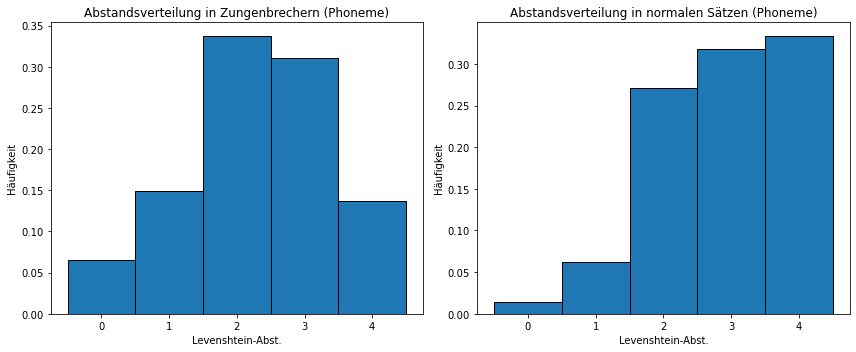

In [258]:
length = min(len(t_sum_list[r]), len(t_sum_list[r]), 20)

tt_bin_edges = np.arange(0, length+1)
tt_hist_values = np.array(t_sum_list[r][:length])

sentence_bin_edges = np.arange(0, length+1)
sentence_hist_values = np.array(s_sum_list[r][:length])

# Subploterstellung (1 Zeile, 2Spalten)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogramm für Zungenbrecher
axs[0].bar(tt_bin_edges[:-1], tt_hist_values, width=np.diff(tt_bin_edges), edgecolor='black')
axs[0].set_title('Abstandsverteilung in Zungenbrechern (Phoneme)')
axs[0].set_xlabel('Levenshtein-Abst.')
axs[0].set_ylabel('Häufigkeit')

# Histogramm für Kontrolldatensatz
axs[1].bar(sentence_bin_edges[:-1], sentence_hist_values, width=np.diff(sentence_bin_edges), edgecolor='black')
axs[1].set_title('Abstandsverteilung in normalen Sätzen (Phoneme)')
axs[1].set_xlabel('Levenshtein-Abst.')
axs[1].set_ylabel('Häufigkeit')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [260]:
print(t_sum_list[r], len(t_sum_list[r]))
print(s_sum_list[r], len(s_sum_list[r]))

diff_sum_hist = [0]*min(len(s_sum_list[r]), len(t_sum_list[r]), 20)
# if len(t_sum_list[r])>len(s_sum_list[r]): diff_sum_hist += [0]*(1+len(t_sum_list[r])-len(s_sum_list[r]))
for i in range(min(len(s_sum_list[r]), len(t_sum_list[r]), 20)):
    diff_sum_hist[i] = t_sum_list[r][i] - s_sum_list[r][i]
print(diff_sum_hist, len(diff_sum_hist))

[0.0648592994478821, 0.1490942293598813, 0.3369727718169151, 0.3100581411970635, 0.13639971363416314] 5
[0.014184257232006201, 0.06254138370005388, 0.2714842440448674, 0.3182698100937365, 0.3331203049293315] 5
[0.050675042215875904, 0.0865528456598274, 0.06548852777204772, -0.008211668896673019, -0.19672059129516833] 5


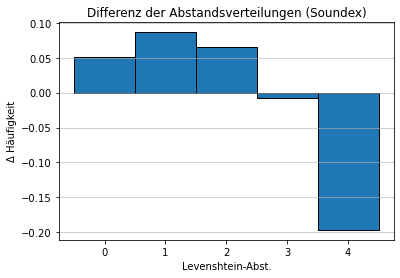

In [276]:
diff_bin_edges = np.arange(0, len(diff_sum_hist)+1)
diff_hist_values = np.array(diff_sum_hist)


plt.bar(diff_bin_edges[:-1], diff_hist_values, width=np.diff(diff_bin_edges), edgecolor='black')
plt.title('Differenz der Abstandsverteilungen (Soundex)')
plt.xlabel('Levenshtein-Abst.')
plt.ylabel('Δ Häufigkeit')
plt.grid(axis='y', alpha=0.75)
plt.show()

TEXT:
- Werte bei 0 und 1 bei Seite: sieht aus, wie zwei Normalverteilungen voneinander abgezoge (ist es ja auch)
- also: gesamte Distance-Verteilung bei Zungenbrechern nach links verschoben -> insgesamt ähnlichere Wörter
- Werte bei 0 und 1: überproportional viele sehr ähnliche und gleiche Wörter in Zungenbrechern
-> bringt das eine Unterscheidbarkeit? Clustering/logistische Regression?

PHONEME:

SOUNDEX:

##### gleiche/sehr ähnliche Wörter

In [272]:
# Listen mit X- und Y-Werten 
# (X-Wert: Anteil dist=0 an allen Wortabständen im Zungenbrecher/Satz,
# Y-Wert:Anteil dist=1 an allen Wortabständen im Zungenbrecher/Satz)

tt_0 = []
tt_1 = []
for t in t_list[r]:
    if len(t)>4:
        print(t)
        tt_0.append(t[1])
        tt_1.append(t[4])
s_0 = []
s_1 = []
for t in s_list[r]:
    if len(t)>4:
        s_0.append(t[1])
        s_1.append(t[4])

[0.0802139  0.09803922 0.33511586 0.38680927 0.09982175]
[0.09473684 0.22105263 0.44210526 0.21052632 0.03157895]
[0.02564103 0.07692308 0.24358974 0.25641026 0.3974359 ]
[0.02222222 0.22222222 0.4        0.31111111 0.04444444]
[0.         0.         0.33333333 0.16666667 0.5       ]
[0.02590194 0.07678076 0.30249769 0.36447734 0.23034228]
[0.         0.2        0.4        0.26666667 0.13333333]
[0.08333333 0.08333333 0.61111111 0.11111111 0.11111111]
[0.04761905 0.23809524 0.04761905 0.42857143 0.23809524]
[0.06666667 0.13333333 0.46666667 0.2        0.13333333]
[0.03870968 0.14193548 0.38064516 0.32903226 0.10967742]
[0.04985063 0.03696789 0.27856609 0.38181479 0.2528006 ]
[0.12121212 0.13636364 0.37878788 0.3030303  0.06060606]
[0.18803419 0.33903134 0.36182336 0.08262108 0.02849003]
[0.         0.16666667 0.         0.5        0.33333333]
[0.01098901 0.15384615 0.34065934 0.32967033 0.16483516]
[0.06666667 0.08888889 0.26666667 0.24444444 0.33333333]
[0.04761905 0.0952381  0.333333

###### plot

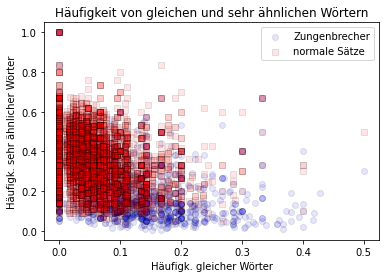

In [273]:


# Scatterplot mit beiden Datensätzen
plt.scatter(tt_0, tt_1, marker='o', color='blue', label='Zungenbrecher', edgecolors='black', alpha=0.1)
plt.scatter(s_0, s_1, marker='s', color='red', label='normale Sätze', edgecolors='black', alpha=0.1)


plt.xlabel('Häufigk. gleicher Wörter')
plt.ylabel('Häufigk. sehr ähnlicher Wörter')
plt.title('Häufigkeit von gleichen und sehr ähnlichen Wörtern')
plt.legend()
plt.show()

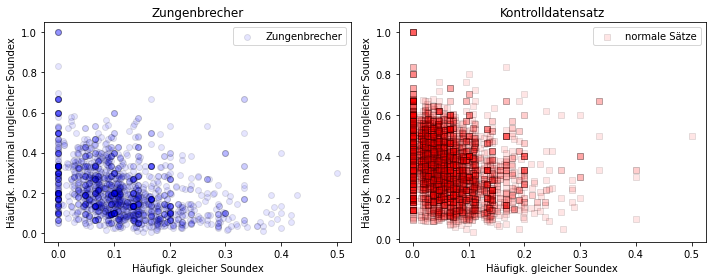

In [275]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # Adjust the figsize as needed

# Scatter plot for Dataset 1
axs[0].scatter(tt_0, tt_1, marker='o', color='blue', label='Zungenbrecher', edgecolors='black', alpha=0.1)
axs[0].set_title('Zungenbrecher')
axs[0].set_xlabel('Häufigk. gleicher Soundex')
axs[0].set_ylabel('Häufigk. maximal ungleicher Soundex')
axs[0].legend()

# Scatter plot for Dataset 2
axs[1].scatter(s_0, s_1, marker='s', color='red', label='normale Sätze', edgecolors='black', alpha=0.1)
axs[1].set_title('Kontrolldatensatz')
axs[1].set_xlabel('Häufigk. gleicher Soundex')
axs[1].set_ylabel('Häufigk. maximal ungleicher Soundex')
axs[1].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

###### histogramme

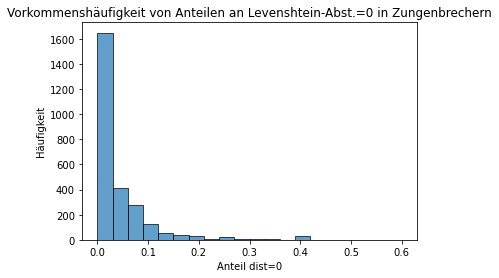

In [255]:
# Create a histogram
plt.hist(tt_0, bins=20, edgecolor='black', alpha=0.7)

# Customize plot labels and title
plt.title('Vorkommenshäufigkeit von Anteilen an Levenshtein-Abst.=0 in Zungenbrechern')
plt.xlabel('Anteil dist=0')
plt.ylabel('Häufigkeit')

# Show the plot
plt.show()

- zu nahe aufeinander, reicht nicht für ein Modell.
- weitere Möglichkeiten: mehr als nur Abstand = 0/=1 betrachten
 --> Varianz, Durchschnitt, 

##### Varianz